In [1]:
import os

import matplotlib.pyplot as plt
from pickle import load

from absl import logging
from utils.lib_utils import FLAGS
from utils.lib_utils import start

In [15]:
file='/Users/watcharinsarachai/Documents/_trained_models/orchids2019/mobilenet_v2_140_stn_v15/07-07-2021-history-pretrain2'
file_to_load = "{}.pack".format(file)
file_to_save = "{}.png".format(file)
workspace_path = os.environ["WORKSPACE"] if "WORKSPACE" in os.environ else "/Volumes/Data/tmp"
history_file = os.path.join(workspace_path, "orchids-models", "orchids2019", "mobilenet_v2_140_stn_v15", file_to_load)
output_file = os.path.join(workspace_path, "orchids-models", "orchids2019", "mobilenet_v2_140_stn_v15", file_to_save)

In [16]:
history = load(open(history_file, "rb"))

In [17]:
train_loss = history["train_loss"]
regularization_loss = history["reg_loss"]
boundary_loss = history["b_loss"]
total_loss = history["total_loss"]
accuracy = history["accuracy"]
num_of_data = len(accuracy)
epochs_range = range(num_of_data)

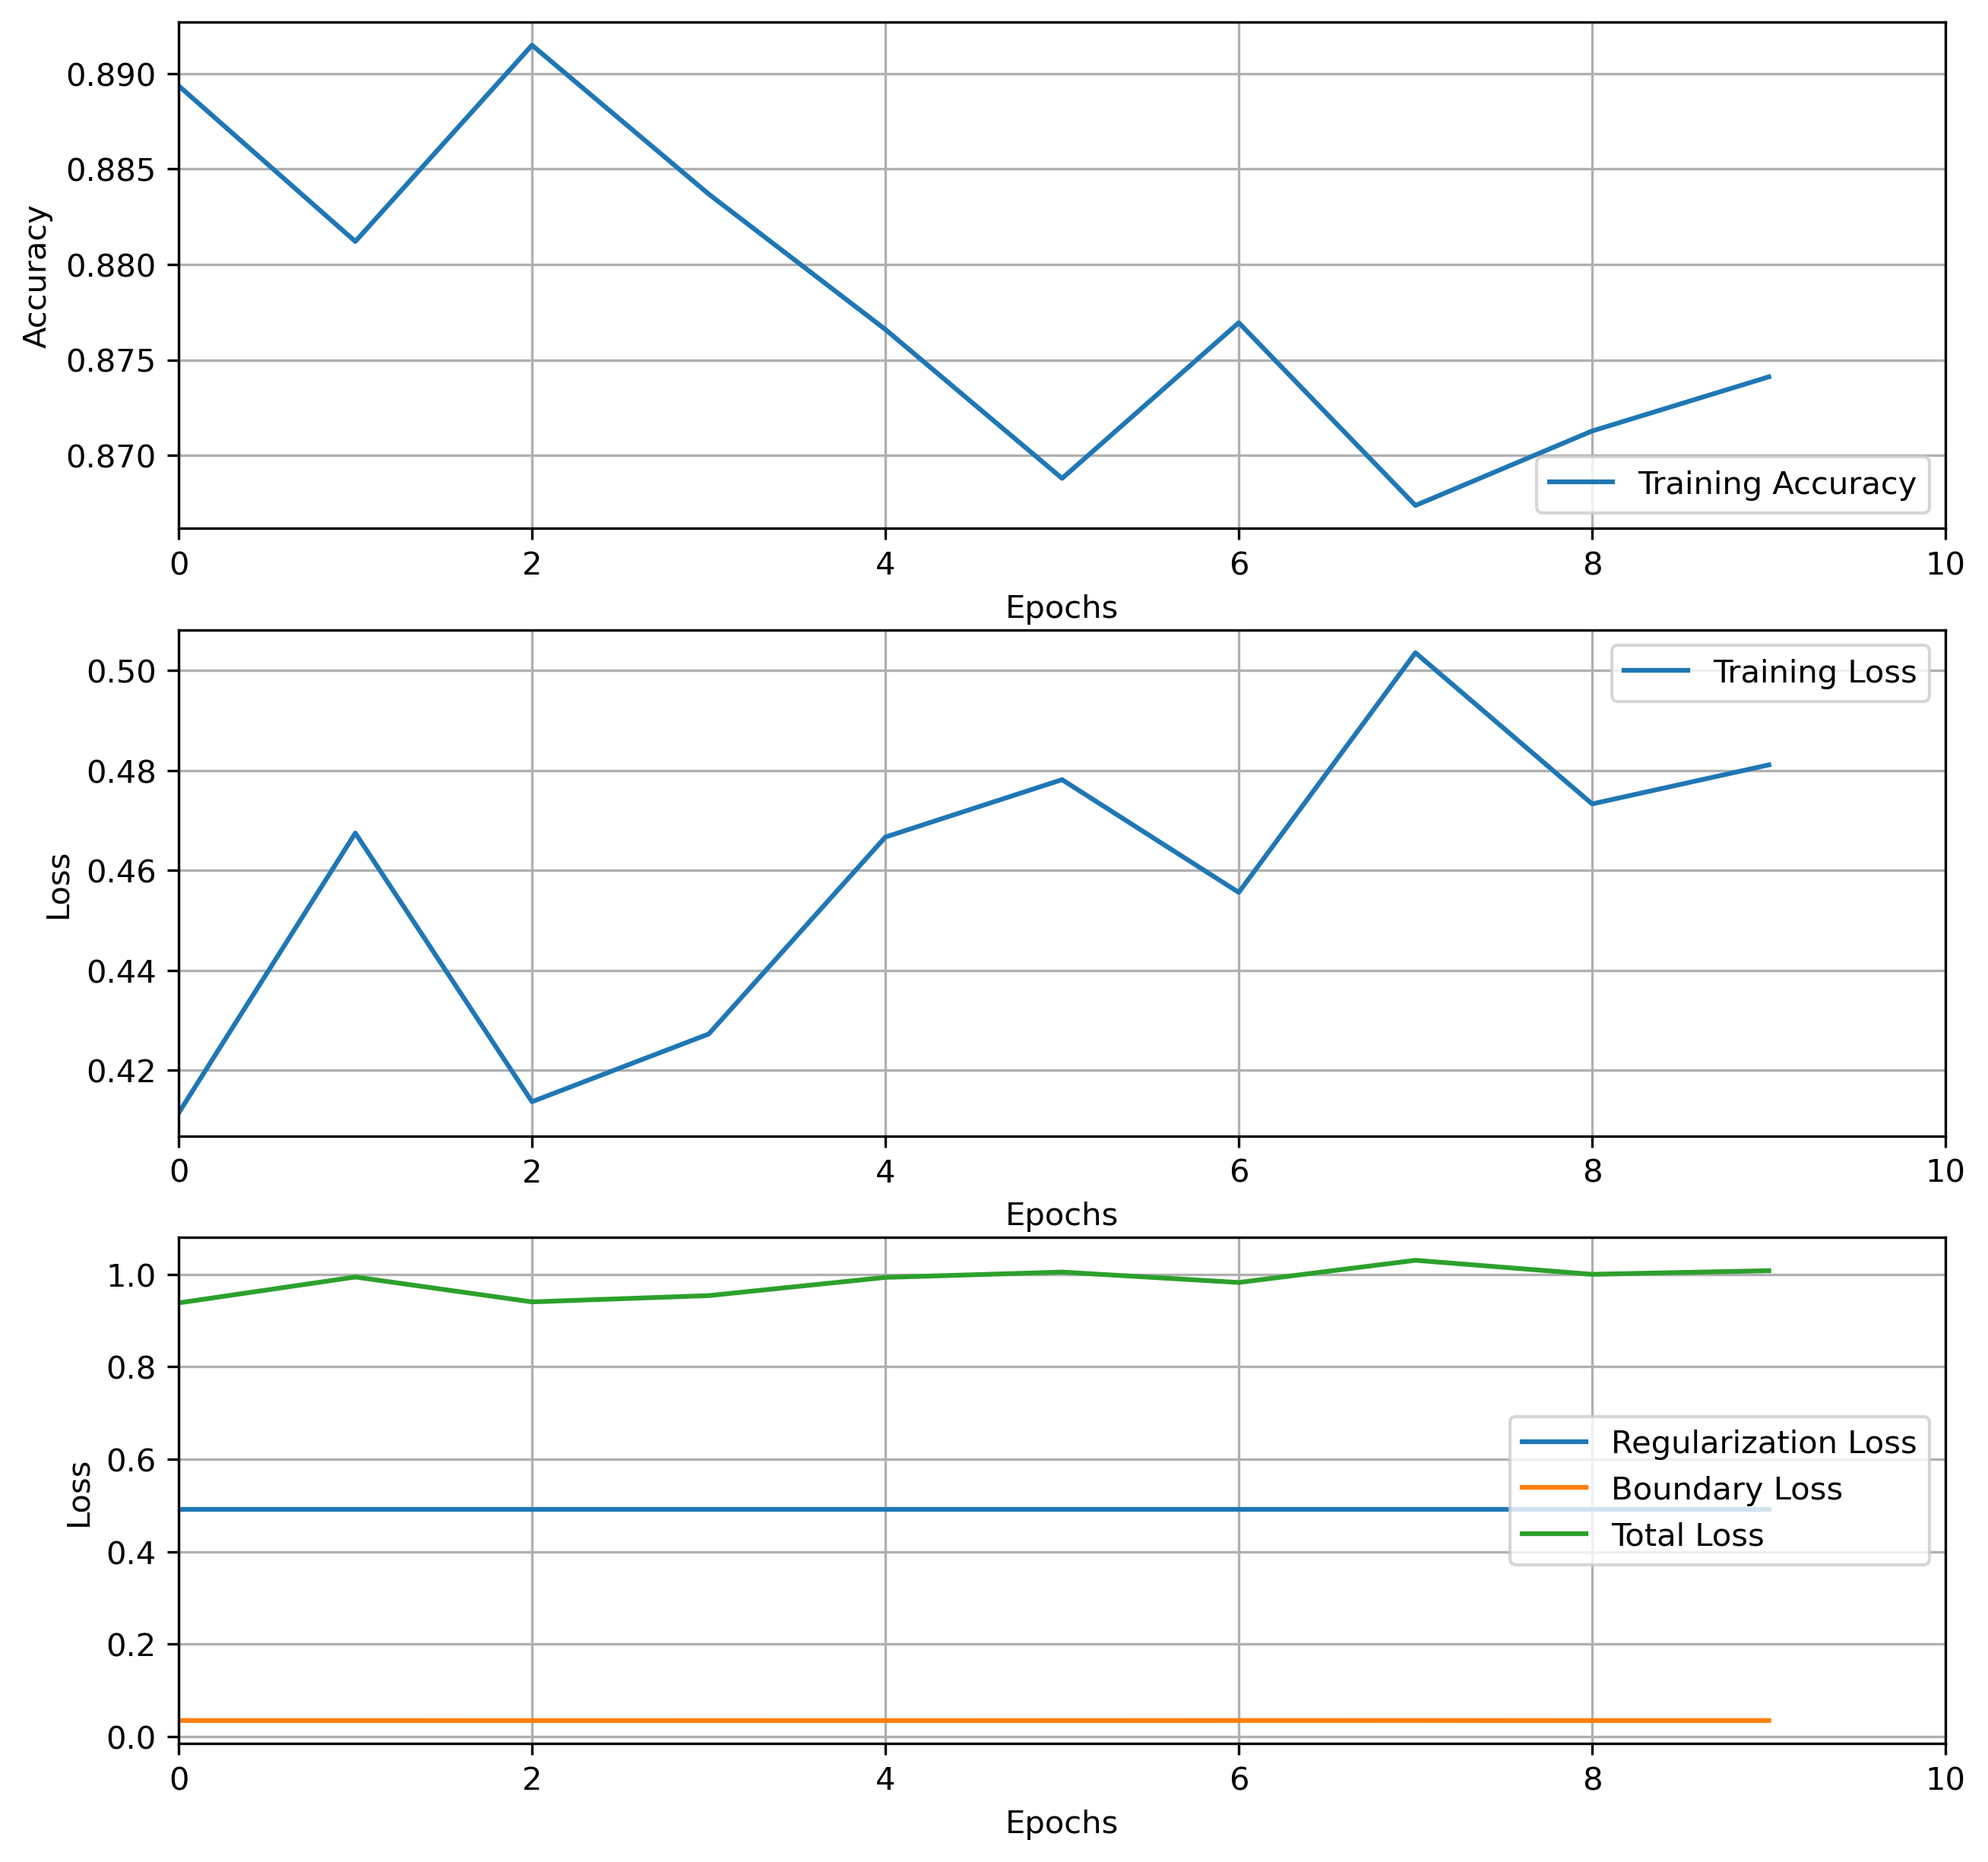

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10), dpi=300)

axs[0].plot(epochs_range, accuracy, label="Training Accuracy")
# axs[0].plot(epochs_range, validation_accuracy, label="Validation Accuracy")
axs[0].set_xlim(0, num_of_data)
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].grid(True)

axs[1].plot(epochs_range, train_loss, label="Training Loss")
# axs[1].plot(epochs_range, validation_loss, label="Validation Loss")
axs[1].set_xlim(0, num_of_data)
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].grid(True)

axs[2].plot(epochs_range, regularization_loss, label="Regularization Loss")
axs[2].plot(epochs_range, boundary_loss, label="Boundary Loss")
axs[2].plot(epochs_range, total_loss, label="Total Loss")
axs[2].set_xlim(0, num_of_data)
axs[2].set_xlabel("Epochs")
axs[2].set_ylabel("Loss")
axs[2].legend(loc="center right")
axs[2].grid(True)

In [6]:
fig.tight_layout()
plt.savefig(output_file)

<Figure size 432x288 with 0 Axes>